### Logistic Regression Task

##### 사람의 체온과 습도를 통한 스트레스 예측

- Humidity: 스트레스를 느낄 때, 여러분의 체온이 상승하여 땀샘이 활성화됩니다. 이 땀은 습도 수준으로 여겨집니다.
- Temperature: 스트레스를 받는 동안 사람의 체온입니다.
- Stepcount: 스트레스를 받는 상황에서 당사자가 적용하는 스텝 수입니다.
- Stress_Level: 위의 세 가지 요인에 기초하여 스트레스 수준을 높음, 중간 및 낮음으로 예측합니다.

In [1]:
import pandas as pd

stress_df = pd.read_csv('./datasets/stress.csv')
stress_df

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
...,...,...,...,...
1996,21.82,90.82,96,1
1997,10.45,79.45,45,0
1998,27.22,96.22,135,2
1999,12.46,81.46,64,0


In [2]:
stress_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step_count    2001 non-null   int64  
 3   Stress_Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [3]:
stress_df.isna().sum()

Humidity        0
Temperature     0
Step_count      0
Stress_Level    0
dtype: int64

In [4]:
stress_df.duplicated().sum()

0

array([[<Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'Step_count'}>,
        <Axes: title={'center': 'Stress_Level'}>]], dtype=object)

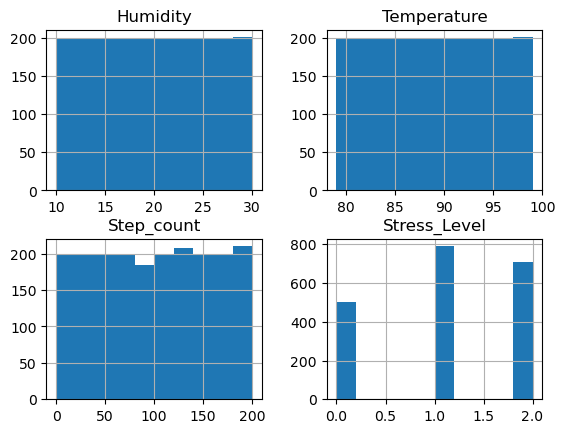

In [5]:
stress_df.hist()

In [6]:
stress_df.Stress_Level.value_counts()

Stress_Level
1    790
2    710
0    501
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

params = {'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'saga']}

features, targets = stress_df.iloc[:,:-1], stress_df.Stress_Level

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, stratify=targets, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

grid_lg = GridSearchCV(LogisticRegression(max_iter=500, penalty='l2', random_state=124), param_grid=params, cv=3, refit=True)
grid_lg.fit(X_train_over, y_train_over)
prediction = grid_lg.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

In [8]:
# DataFrame으로 변환
scores_df = pd.DataFrame(grid_lg.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']].sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
6,"{'C': 1, 'solver': 'lbfgs'}",0.998794,1,1.000000,0.998192,0.998192
8,"{'C': 10, 'solver': 'lbfgs'}",0.998794,1,1.000000,0.998192,0.998192
4,"{'C': 0.1, 'solver': 'lbfgs'}",0.998192,3,0.998192,1.000000,0.996383
7,"{'C': 1, 'solver': 'saga'}",0.994575,4,0.989150,0.998192,0.996383
9,"{'C': 10, 'solver': 'saga'}",0.994575,4,0.989150,0.998192,0.996383
5,"{'C': 0.1, 'solver': 'saga'}",0.993369,6,0.987342,0.998192,0.994575
2,"{'C': 0.01, 'solver': 'lbfgs'}",0.990958,7,0.985533,0.996383,0.990958
3,"{'C': 0.01, 'solver': 'saga'}",0.976492,8,0.978300,0.976492,0.974684
0,"{'C': 0.001, 'solver': 'lbfgs'}",0.972875,9,0.972875,0.978300,0.967450
1,"{'C': 0.001, 'solver': 'saga'}",0.923448,10,0.911392,0.931284,0.927667


In [9]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='macro')
#     재현율
    recall = recall_score(y_test , prediction, average='macro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='macro')
#     ROC-AUC
#     roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy , precision ,recall, f1))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[151   0   0]
 [  0 237   0]
 [  0   0 213]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1:1.0000
###########################################################################


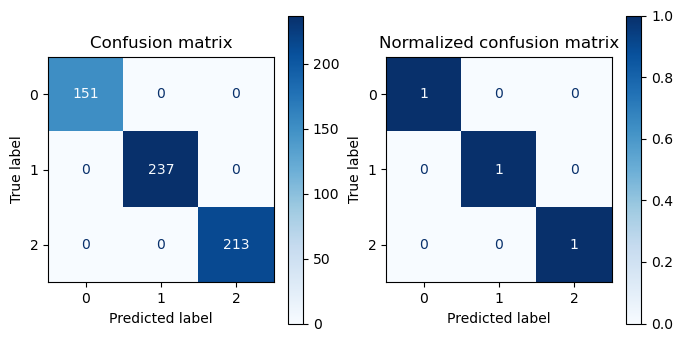

In [10]:
get_evaluation(y_test, prediction, grid_lg, X_test)

오차 행렬
[[149   2   0]
 [ 45 186   6]
 [  0   1 212]]
정확도: 0.9101, 정밀도: 0.9082, 재현율: 0.9223, F1:0.9069
###########################################################################


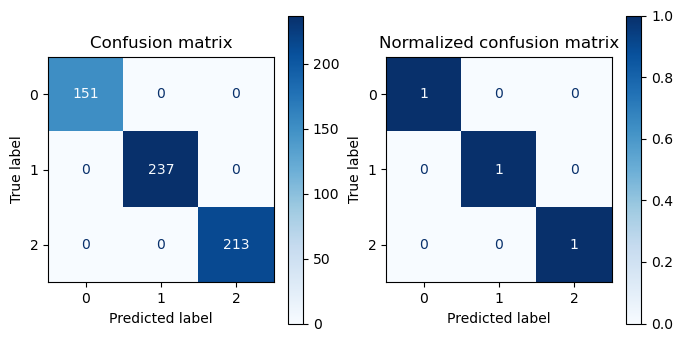

In [11]:
lg = LogisticRegression(max_iter=500, penalty='l2', random_state=124, C=0.0001, solver='lbfgs')

features, targets = stress_df.iloc[:,:-1], stress_df.Stress_Level

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, stratify=targets, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

lg.fit(X_train_over, y_train_over)
prediction = lg.predict(X_test)

get_evaluation(y_test, prediction, grid_lg, X_test)